In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

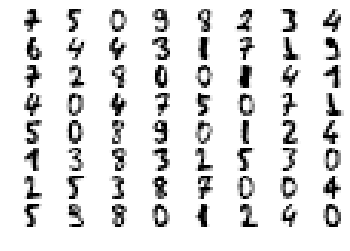

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.58246 stdev: 0.26527
Best fitness: 0.92826 - size: (2, 13) - species 1 - id 77
Average adjusted fitness: 0.479
Mean genetic distance 2.868, standard deviation 0.481
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 36.016 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.72957 stdev: 0.23270
Best fitness: 0.96228 - size: (3, 15) - species 1 - id 361
Average adjusted fitness: 0.605
Mean genetic distance 3.010, standard deviation 0.493
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 39.661 sec (37.838 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.79273 stdev: 0.19420
Best fitness: 0.96228 - size: (3, 15) - species 21 - id 361
Average adjusted fitness: 0.677
Mean genetic distance 3.046, standard deviation 0.490
Population of 204 members in 28 species
Total extin

Population's average fitness: 0.85953 stdev: 0.17662
Best fitness: 0.99196 - size: (7, 25) - species 11 - id 1846
Average adjusted fitness: 0.748
Mean genetic distance 3.256, standard deviation 0.565
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 34.164 sec (37.382 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.86197 stdev: 0.15918
Best fitness: 0.99196 - size: (7, 25) - species 11 - id 1846
Average adjusted fitness: 0.753
Mean genetic distance 3.250, standard deviation 0.566
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 33.738 sec (36.747 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.83348 stdev: 0.20164
Best fitness: 0.99196 - size: (7, 25) - species 11 - id 1846
Average adjusted fitness: 0.726
Mean genetic distance 3.264, standard deviation 0.552
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 33.745 sec (36.148 average)

 

Population's average fitness: 0.85499 stdev: 0.19767
Best fitness: 0.99196 - size: (7, 25) - species 11 - id 1846
Average adjusted fitness: 0.754
Mean genetic distance 3.268, standard deviation 0.583
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 37.419 sec (37.300 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.86628 stdev: 0.18581
Best fitness: 0.99196 - size: (7, 25) - species 11 - id 1846
Average adjusted fitness: 0.754
Mean genetic distance 3.262, standard deviation 0.583
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 38.423 sec (37.509 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.87611 stdev: 0.16159
Best fitness: 0.99196 - size: (7, 25) - species 11 - id 1846
Average adjusted fitness: 0.774
Mean genetic distance 3.222, standard deviation 0.605
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 37.838 sec (37.596 average)

 

Population's average fitness: 0.86958 stdev: 0.17244
Best fitness: 0.99382 - size: (9, 26) - species 55 - id 10346
Average adjusted fitness: 0.735
Mean genetic distance 3.187, standard deviation 0.596
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 41.991 sec (43.182 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.86039 stdev: 0.18305
Best fitness: 0.99382 - size: (9, 26) - species 55 - id 10346
Average adjusted fitness: 0.762
Mean genetic distance 3.205, standard deviation 0.574
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 43.770 sec (43.284 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.87784 stdev: 0.15437
Best fitness: 0.99382 - size: (9, 26) - species 55 - id 10346
Average adjusted fitness: 0.734
Mean genetic distance 3.216, standard deviation 0.576
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 42.970 sec (43.270 average)

Population's average fitness: 0.85710 stdev: 0.19313
Best fitness: 0.99382 - size: (9, 26) - species 55 - id 10346
Average adjusted fitness: 0.740
Mean genetic distance 3.293, standard deviation 0.589
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 48.716 sec (46.618 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.84384 stdev: 0.21894
Best fitness: 0.99382 - size: (9, 26) - species 55 - id 10346
Average adjusted fitness: 0.733
Mean genetic distance 3.282, standard deviation 0.600
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 50.767 sec (47.184 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.85488 stdev: 0.19469
Best fitness: 0.99382 - size: (9, 26) - species 55 - id 10346
Average adjusted fitness: 0.758
Mean genetic distance 3.253, standard deviation 0.612
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 49.271 sec (47.557 average)

Population's average fitness: 0.85632 stdev: 0.19696
Best fitness: 0.99443 - size: (12, 39) - species 16 - id 16289
Average adjusted fitness: 0.725
Mean genetic distance 3.188, standard deviation 0.620
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 60.259 sec (54.389 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.84334 stdev: 0.20232
Best fitness: 0.99443 - size: (12, 39) - species 16 - id 16289
Average adjusted fitness: 0.709
Mean genetic distance 3.154, standard deviation 0.632
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 58.342 sec (55.158 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.82910 stdev: 0.21540
Best fitness: 0.99443 - size: (12, 39) - species 16 - id 16289
Average adjusted fitness: 0.702
Mean genetic distance 3.163, standard deviation 0.609
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 55.144 sec (55.409 ave

Population's average fitness: 0.89458 stdev: 0.13424
Best fitness: 0.99443 - size: (12, 39) - species 16 - id 16289
Average adjusted fitness: 0.741
Mean genetic distance 3.178, standard deviation 0.590
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 56.112 sec (56.997 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.89774 stdev: 0.14417
Best fitness: 0.99443 - size: (12, 39) - species 16 - id 16289
Average adjusted fitness: 0.799
Mean genetic distance 3.171, standard deviation 0.567
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 55.200 sec (56.741 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.85676 stdev: 0.20425
Best fitness: 0.99443 - size: (12, 39) - species 16 - id 16289
Average adjusted fitness: 0.756
Mean genetic distance 3.205, standard deviation 0.574
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 61.291 sec (57.186 ave

Population's average fitness: 0.82656 stdev: 0.17877
Best fitness: 0.94620 - size: (7, 20) - species 3 - id 2114
Average adjusted fitness: 0.718
Mean genetic distance 3.194, standard deviation 0.513
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 33.398 sec (31.883 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.80562 stdev: 0.21064
Best fitness: 0.94620 - size: (7, 20) - species 3 - id 2114
Average adjusted fitness: 0.697
Mean genetic distance 3.156, standard deviation 0.520
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 34.090 sec (32.198 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.81823 stdev: 0.18695
Best fitness: 0.94620 - size: (7, 20) - species 3 - id 2114
Average adjusted fitness: 0.705
Mean genetic distance 3.169, standard deviation 0.514
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 34.277 sec (32.511 average)

 ***

Population's average fitness: 0.80203 stdev: 0.19706
Best fitness: 0.95176 - size: (9, 24) - species 40 - id 4940
Average adjusted fitness: 0.701
Mean genetic distance 3.119, standard deviation 0.587
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 35.100 sec (34.841 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.81132 stdev: 0.19465
Best fitness: 0.95176 - size: (9, 24) - species 40 - id 4940
Average adjusted fitness: 0.716
Mean genetic distance 3.110, standard deviation 0.566
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 35.546 sec (34.939 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.81857 stdev: 0.18178
Best fitness: 0.95176 - size: (9, 24) - species 40 - id 4940
Average adjusted fitness: 0.715
Mean genetic distance 3.127, standard deviation 0.561
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 36.084 sec (35.098 average)

 

Population's average fitness: 0.82756 stdev: 0.18867
Best fitness: 0.95671 - size: (11, 31) - species 40 - id 10040
Average adjusted fitness: 0.720
Mean genetic distance 3.126, standard deviation 0.578
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 40.111 sec (39.643 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.80858 stdev: 0.20049
Best fitness: 0.95671 - size: (11, 31) - species 40 - id 10040
Average adjusted fitness: 0.700
Mean genetic distance 3.112, standard deviation 0.568
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 38.925 sec (39.613 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.81503 stdev: 0.19753
Best fitness: 0.95671 - size: (11, 31) - species 40 - id 10040
Average adjusted fitness: 0.712
Mean genetic distance 3.121, standard deviation 0.565
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 40.535 sec (39.783 avera

Population's average fitness: 0.80761 stdev: 0.20410
Best fitness: 0.95671 - size: (11, 31) - species 40 - id 10040
Average adjusted fitness: 0.706
Mean genetic distance 3.192, standard deviation 0.593
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 33.088 sec (36.878 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.80414 stdev: 0.18997
Best fitness: 0.95671 - size: (11, 31) - species 40 - id 10040
Average adjusted fitness: 0.703
Mean genetic distance 3.184, standard deviation 0.608
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 33.586 sec (36.402 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.81807 stdev: 0.16793
Best fitness: 0.95671 - size: (11, 31) - species 40 - id 10040
Average adjusted fitness: 0.709
Mean genetic distance 3.168, standard deviation 0.617
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 32.644 sec (35.725 avera

Population's average fitness: 0.81642 stdev: 0.18757
Best fitness: 0.95733 - size: (11, 31) - species 40 - id 15484
Average adjusted fitness: 0.706
Mean genetic distance 3.167, standard deviation 0.623
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 35.310 sec (35.650 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.84394 stdev: 0.16119
Best fitness: 0.95733 - size: (11, 31) - species 40 - id 15484
Average adjusted fitness: 0.705
Mean genetic distance 3.079, standard deviation 0.594
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 34.841 sec (35.715 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.84966 stdev: 0.15507
Best fitness: 0.95733 - size: (11, 31) - species 40 - id 15484
Average adjusted fitness: 0.662
Mean genetic distance 3.096, standard deviation 0.560
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 34.251 sec (35.669 ave

Population's average fitness: 0.82832 stdev: 0.16022
Best fitness: 0.95733 - size: (11, 31) - species 40 - id 15484
Average adjusted fitness: 0.639
Mean genetic distance 2.992, standard deviation 0.510
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 40.691 sec (38.149 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.83331 stdev: 0.16977
Best fitness: 0.95733 - size: (11, 31) - species 40 - id 15484
Average adjusted fitness: 0.727
Mean genetic distance 2.985, standard deviation 0.516
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 39.893 sec (38.465 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.81217 stdev: 0.19126
Best fitness: 0.95733 - size: (11, 31) - species 40 - id 15484
Average adjusted fitness: 0.697
Mean genetic distance 2.986, standard deviation 0.505
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 40.919 sec (38.848 ave

Population's average fitness: 0.83557 stdev: 0.16253
Best fitness: 0.96599 - size: (5, 19) - species 29 - id 1232
Average adjusted fitness: 0.708
Mean genetic distance 3.159, standard deviation 0.504
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 21.751 sec (21.426 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.83994 stdev: 0.16749
Best fitness: 0.96599 - size: (5, 19) - species 29 - id 1232
Average adjusted fitness: 0.723
Mean genetic distance 3.186, standard deviation 0.499
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 22.111 sec (21.594 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.83482 stdev: 0.17445
Best fitness: 0.96599 - size: (5, 19) - species 29 - id 1232
Average adjusted fitness: 0.714
Mean genetic distance 3.151, standard deviation 0.497
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 22.890 sec (21.805 average)

 

Population's average fitness: 0.78694 stdev: 0.21257
Best fitness: 0.96599 - size: (5, 19) - species 29 - id 1232
Average adjusted fitness: 0.686
Mean genetic distance 3.195, standard deviation 0.532
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 25.311 sec (24.667 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.82468 stdev: 0.17324
Best fitness: 0.96599 - size: (5, 19) - species 29 - id 1232
Average adjusted fitness: 0.732
Mean genetic distance 3.167, standard deviation 0.548
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 25.664 sec (24.837 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.83551 stdev: 0.16624
Best fitness: 0.96599 - size: (5, 19) - species 29 - id 1232
Average adjusted fitness: 0.737
Mean genetic distance 3.149, standard deviation 0.554
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 25.643 sec (24.917 average)

 

Population's average fitness: 0.83555 stdev: 0.17662
Best fitness: 0.96846 - size: (6, 21) - species 40 - id 7758
Average adjusted fitness: 0.736
Mean genetic distance 3.211, standard deviation 0.553
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 27.441 sec (27.057 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.85182 stdev: 0.14045
Best fitness: 0.96846 - size: (6, 21) - species 40 - id 7758
Average adjusted fitness: 0.593
Mean genetic distance 3.203, standard deviation 0.567
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 27.073 sec (27.030 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.83264 stdev: 0.16601
Best fitness: 0.96846 - size: (6, 21) - species 40 - id 7758
Average adjusted fitness: 0.730
Mean genetic distance 3.213, standard deviation 0.558
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 28.063 sec (27.225 average)

 

Population's average fitness: 0.84929 stdev: 0.14159
Best fitness: 0.97403 - size: (8, 21) - species 40 - id 12176
Average adjusted fitness: 0.752
Mean genetic distance 3.166, standard deviation 0.566
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 30.489 sec (29.285 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.83526 stdev: 0.15086
Best fitness: 0.97403 - size: (8, 21) - species 40 - id 12176
Average adjusted fitness: 0.715
Mean genetic distance 3.163, standard deviation 0.572
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 29.223 sec (29.281 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.83266 stdev: 0.17648
Best fitness: 0.97403 - size: (8, 21) - species 40 - id 12176
Average adjusted fitness: 0.734
Mean genetic distance 3.189, standard deviation 0.569
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 29.692 sec (29.413 average)

Population's average fitness: 0.82155 stdev: 0.18480
Best fitness: 0.97403 - size: (8, 21) - species 65 - id 12176
Average adjusted fitness: 0.722
Mean genetic distance 3.107, standard deviation 0.544
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 28.515 sec (29.502 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.82937 stdev: 0.19021
Best fitness: 0.97403 - size: (8, 21) - species 65 - id 12176
Average adjusted fitness: 0.728
Mean genetic distance 3.074, standard deviation 0.546
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 28.548 sec (29.481 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.83330 stdev: 0.18188
Best fitness: 0.97403 - size: (8, 21) - species 65 - id 12176
Average adjusted fitness: 0.736
Mean genetic distance 3.047, standard deviation 0.551
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 28.798 sec (29.527 averag

Population's average fitness: 0.85297 stdev: 0.17229
Best fitness: 0.97588 - size: (9, 26) - species 40 - id 21537
Average adjusted fitness: 0.754
Mean genetic distance 3.029, standard deviation 0.544
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 32.068 sec (31.872 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.85568 stdev: 0.16511
Best fitness: 0.97588 - size: (9, 26) - species 40 - id 21537
Average adjusted fitness: 0.753
Mean genetic distance 3.026, standard deviation 0.536
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 34.411 sec (32.208 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.84901 stdev: 0.17804
Best fitness: 0.97588 - size: (9, 26) - species 40 - id 21537
Average adjusted fitness: 0.750
Mean genetic distance 3.042, standard deviation 0.529
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 33.161 sec (32.284 averag

Population's average fitness: 0.81332 stdev: 0.17007
Best fitness: 0.93135 - size: (4, 18) - species 10 - id 986
Average adjusted fitness: 0.680
Mean genetic distance 3.041, standard deviation 0.495
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 21.276 sec (19.664 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.82915 stdev: 0.16202
Best fitness: 0.93197 - size: (5, 19) - species 10 - id 1262
Average adjusted fitness: 0.725
Mean genetic distance 3.076, standard deviation 0.499
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.702 sec (19.794 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.85255 stdev: 0.13140
Best fitness: 0.93506 - size: (5, 18) - species 15 - id 1387
Average adjusted fitness: 0.750
Mean genetic distance 3.114, standard deviation 0.513
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.478 sec (19.981 average)

 ***

Population's average fitness: 0.83544 stdev: 0.15551
Best fitness: 0.94125 - size: (10, 28) - species 34 - id 4327
Average adjusted fitness: 0.734
Mean genetic distance 3.173, standard deviation 0.584
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 25.339 sec (24.858 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.82575 stdev: 0.16227
Best fitness: 0.94125 - size: (10, 28) - species 34 - id 4327
Average adjusted fitness: 0.699
Mean genetic distance 3.170, standard deviation 0.568
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 25.716 sec (24.975 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.81442 stdev: 0.18017
Best fitness: 0.94125 - size: (10, 28) - species 34 - id 4327
Average adjusted fitness: 0.714
Mean genetic distance 3.152, standard deviation 0.585
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 24.447 sec (24.920 average)

Population's average fitness: 0.85582 stdev: 0.11894
Best fitness: 0.95176 - size: (9, 28) - species 43 - id 7542
Average adjusted fitness: 0.633
Mean genetic distance 3.220, standard deviation 0.590
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 31.084 sec (30.814 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.83188 stdev: 0.17238
Best fitness: 0.95176 - size: (9, 28) - species 43 - id 7542
Average adjusted fitness: 0.724
Mean genetic distance 3.217, standard deviation 0.590
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 30.880 sec (31.008 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.84363 stdev: 0.15312
Best fitness: 0.95300 - size: (16, 45) - species 44 - id 9075
Average adjusted fitness: 0.739
Mean genetic distance 3.221, standard deviation 0.596
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 29.530 sec (30.963 average)



Population's average fitness: 0.83976 stdev: 0.17215
Best fitness: 0.95795 - size: (18, 45) - species 59 - id 12357
Average adjusted fitness: 0.738
Mean genetic distance 3.330, standard deviation 0.599
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 35.696 sec (33.331 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.81895 stdev: 0.19344
Best fitness: 0.95795 - size: (18, 45) - species 59 - id 12357
Average adjusted fitness: 0.713
Mean genetic distance 3.326, standard deviation 0.588
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 33.881 sec (33.430 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.83884 stdev: 0.16898
Best fitness: 0.95795 - size: (18, 45) - species 59 - id 12357
Average adjusted fitness: 0.736
Mean genetic distance 3.314, standard deviation 0.597
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 35.222 sec (33.730 avera

Population's average fitness: 0.81235 stdev: 0.20631
Best fitness: 0.96104 - size: (16, 39) - species 67 - id 16064
Average adjusted fitness: 0.709
Mean genetic distance 3.334, standard deviation 0.607
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 36.108 sec (36.653 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.76453 stdev: 0.25526
Best fitness: 0.96104 - size: (16, 39) - species 67 - id 16064
Average adjusted fitness: 0.668
Mean genetic distance 3.374, standard deviation 0.601
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 37.213 sec (36.655 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.80533 stdev: 0.19109
Best fitness: 0.96104 - size: (16, 39) - species 67 - id 16064
Average adjusted fitness: 0.713
Mean genetic distance 3.366, standard deviation 0.640
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 37.261 sec (36.706 ave

Population's average fitness: 0.79602 stdev: 0.22355
Best fitness: 0.96351 - size: (19, 46) - species 49 - id 20743
Average adjusted fitness: 0.698
Mean genetic distance 3.218, standard deviation 0.616
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 38.773 sec (36.601 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.82449 stdev: 0.19791
Best fitness: 0.96351 - size: (19, 46) - species 49 - id 20743
Average adjusted fitness: 0.716
Mean genetic distance 3.219, standard deviation 0.636
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 38.994 sec (36.955 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.80666 stdev: 0.21011
Best fitness: 0.96351 - size: (19, 46) - species 49 - id 20743
Average adjusted fitness: 0.703
Mean genetic distance 3.215, standard deviation 0.632
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 39.538 sec (37.287 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.58208 stdev: 0.26633
Best fitness: 0.92022 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.513
Mean genetic distance 2.899, standard deviation 0.459
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.049 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.73519 stdev: 0.22578
Best fitness: 0.93754 - size: (3, 15) - species 13 - id 377
Average adjusted fitness: 0.626
Mean genetic distance 2.962, standard deviation 0.482
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 18.642 sec (17.845 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77860 stdev: 0.20353
Best fitness: 0.93754 - size: (3, 15) - species 20 - id 377
Average adjusted fitness: 0.659
Mean genetic distance 3.002, standard deviation 0.498
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 19.318 sec (18.

Population's average fitness: 0.84816 stdev: 0.15711
Best fitness: 0.96351 - size: (6, 22) - species 3 - id 1643
Average adjusted fitness: 0.753
Mean genetic distance 3.217, standard deviation 0.518
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 23.253 sec (22.174 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.83405 stdev: 0.16122
Best fitness: 0.96351 - size: (6, 22) - species 3 - id 1643
Average adjusted fitness: 0.718
Mean genetic distance 3.199, standard deviation 0.523
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 22.878 sec (22.216 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.83977 stdev: 0.18454
Best fitness: 0.96351 - size: (6, 22) - species 3 - id 1643
Average adjusted fitness: 0.711
Mean genetic distance 3.204, standard deviation 0.536
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 22.351 sec (22.272 average)

 ***

Population's average fitness: 0.81369 stdev: 0.21056
Best fitness: 0.97217 - size: (8, 23) - species 3 - id 5547
Average adjusted fitness: 0.703
Mean genetic distance 3.307, standard deviation 0.529
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 25.726 sec (25.449 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.81314 stdev: 0.20210
Best fitness: 0.97217 - size: (8, 23) - species 3 - id 5547
Average adjusted fitness: 0.705
Mean genetic distance 3.299, standard deviation 0.535
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 25.875 sec (25.576 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.81687 stdev: 0.20434
Best fitness: 0.97217 - size: (8, 23) - species 3 - id 5547
Average adjusted fitness: 0.690
Mean genetic distance 3.281, standard deviation 0.554
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 25.696 sec (25.657 average)

 ***

Population's average fitness: 0.81995 stdev: 0.20218
Best fitness: 0.97217 - size: (8, 23) - species 3 - id 5547
Average adjusted fitness: 0.725
Mean genetic distance 3.299, standard deviation 0.538
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 28.788 sec (28.294 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.83592 stdev: 0.16848
Best fitness: 0.97217 - size: (8, 23) - species 3 - id 5547
Average adjusted fitness: 0.738
Mean genetic distance 3.284, standard deviation 0.561
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 29.771 sec (28.514 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.83607 stdev: 0.17015
Best fitness: 0.97217 - size: (8, 23) - species 3 - id 5547
Average adjusted fitness: 0.718
Mean genetic distance 3.234, standard deviation 0.554
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 29.386 sec (28.704 average)

 ***

Population's average fitness: 0.84103 stdev: 0.17275
Best fitness: 0.97217 - size: (8, 23) - species 3 - id 5547
Average adjusted fitness: 0.741
Mean genetic distance 3.119, standard deviation 0.613
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 31.746 sec (32.073 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.82311 stdev: 0.20529
Best fitness: 0.97217 - size: (8, 23) - species 3 - id 5547
Average adjusted fitness: 0.726
Mean genetic distance 3.144, standard deviation 0.585
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 31.859 sec (32.118 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.82925 stdev: 0.18609
Best fitness: 0.97217 - size: (8, 23) - species 3 - id 5547
Average adjusted fitness: 0.729
Mean genetic distance 3.167, standard deviation 0.571
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 31.994 sec (31.956 average)

 ***

Population's average fitness: 0.84947 stdev: 0.17491
Best fitness: 0.97588 - size: (9, 33) - species 47 - id 17927
Average adjusted fitness: 0.733
Mean genetic distance 3.139, standard deviation 0.591
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 30.975 sec (32.050 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.84803 stdev: 0.17355
Best fitness: 0.97588 - size: (9, 33) - species 47 - id 17927
Average adjusted fitness: 0.735
Mean genetic distance 3.125, standard deviation 0.602
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 31.715 sec (32.052 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.84033 stdev: 0.17330
Best fitness: 0.97588 - size: (9, 33) - species 47 - id 17927
Average adjusted fitness: 0.740
Mean genetic distance 3.173, standard deviation 0.618
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 33.850 sec (32.303 averag

Population's average fitness: 0.83852 stdev: 0.20498
Best fitness: 0.97588 - size: (9, 33) - species 47 - id 17927
Average adjusted fitness: 0.738
Mean genetic distance 3.078, standard deviation 0.622
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 35.717 sec (36.059 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.84063 stdev: 0.19515
Best fitness: 0.97588 - size: (9, 33) - species 47 - id 17927
Average adjusted fitness: 0.734
Mean genetic distance 3.071, standard deviation 0.604
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 36.604 sec (36.190 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.83570 stdev: 0.19256
Best fitness: 0.97588 - size: (9, 33) - species 47 - id 17927
Average adjusted fitness: 0.732
Mean genetic distance 3.029, standard deviation 0.634
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 36.103 sec (36.254 averag

Population's average fitness: 0.83151 stdev: 0.16823
Best fitness: 0.96104 - size: (6, 25) - species 27 - id 2270
Average adjusted fitness: 0.705
Mean genetic distance 3.093, standard deviation 0.507
Population of 209 members in 32 species
Total extinctions: 0
Generation time: 21.624 sec (21.600 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.81949 stdev: 0.17698
Best fitness: 0.96104 - size: (6, 25) - species 27 - id 2270
Average adjusted fitness: 0.702
Mean genetic distance 3.097, standard deviation 0.527
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 23.417 sec (21.774 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.83196 stdev: 0.17234
Best fitness: 0.96289 - size: (6, 26) - species 27 - id 2943
Average adjusted fitness: 0.722
Mean genetic distance 3.154, standard deviation 0.529
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 22.228 sec (21.884 average)

 

Population's average fitness: 0.81599 stdev: 0.19236
Best fitness: 0.97650 - size: (9, 32) - species 27 - id 5847
Average adjusted fitness: 0.695
Mean genetic distance 3.317, standard deviation 0.559
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 27.396 sec (26.457 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.81761 stdev: 0.19281
Best fitness: 0.97650 - size: (9, 32) - species 27 - id 5847
Average adjusted fitness: 0.711
Mean genetic distance 3.338, standard deviation 0.579
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 27.691 sec (26.713 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.82491 stdev: 0.18293
Best fitness: 0.97650 - size: (9, 32) - species 27 - id 5847
Average adjusted fitness: 0.717
Mean genetic distance 3.348, standard deviation 0.556
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 27.736 sec (26.981 average)

 

Population's average fitness: 0.83934 stdev: 0.16406
Best fitness: 0.97650 - size: (9, 32) - species 27 - id 5847
Average adjusted fitness: 0.736
Mean genetic distance 3.285, standard deviation 0.627
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 31.365 sec (30.752 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.84044 stdev: 0.16140
Best fitness: 0.97650 - size: (9, 32) - species 27 - id 5847
Average adjusted fitness: 0.729
Mean genetic distance 3.271, standard deviation 0.623
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 32.799 sec (30.899 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.83236 stdev: 0.17099
Best fitness: 0.97650 - size: (9, 32) - species 27 - id 5847
Average adjusted fitness: 0.716
Mean genetic distance 3.257, standard deviation 0.632
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 32.223 sec (30.959 average)

 

Population's average fitness: 0.81984 stdev: 0.18438
Best fitness: 0.97650 - size: (9, 32) - species 27 - id 5847
Average adjusted fitness: 0.714
Mean genetic distance 3.311, standard deviation 0.620
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 35.350 sec (34.545 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.84992 stdev: 0.16155
Best fitness: 0.97650 - size: (9, 32) - species 27 - id 5847
Average adjusted fitness: 0.747
Mean genetic distance 3.297, standard deviation 0.633
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 34.171 sec (34.626 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.84128 stdev: 0.14801
Best fitness: 0.97650 - size: (9, 32) - species 27 - id 5847
Average adjusted fitness: 0.740
Mean genetic distance 3.236, standard deviation 0.675
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 34.202 sec (34.672 average)

 

Population's average fitness: 0.84011 stdev: 0.17039
Best fitness: 0.97712 - size: (23, 52) - species 65 - id 18735
Average adjusted fitness: 0.734
Mean genetic distance 3.173, standard deviation 0.602
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 37.228 sec (35.849 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.83838 stdev: 0.16249
Best fitness: 0.97712 - size: (23, 52) - species 65 - id 18735
Average adjusted fitness: 0.735
Mean genetic distance 3.185, standard deviation 0.584
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 39.069 sec (36.177 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.83573 stdev: 0.16222
Best fitness: 0.97712 - size: (23, 52) - species 65 - id 18735
Average adjusted fitness: 0.736
Mean genetic distance 3.207, standard deviation 0.597
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 38.986 sec (36.542 ave

Population's average fitness: 0.84378 stdev: 0.15958
Best fitness: 0.98516 - size: (30, 67) - species 68 - id 22140
Average adjusted fitness: 0.733
Mean genetic distance 3.383, standard deviation 0.591
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 42.650 sec (41.388 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.83453 stdev: 0.16989
Best fitness: 0.98516 - size: (30, 67) - species 68 - id 22140
Average adjusted fitness: 0.738
Mean genetic distance 3.385, standard deviation 0.609
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 45.598 sec (41.813 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.82178 stdev: 0.19821
Best fitness: 0.98516 - size: (30, 67) - species 68 - id 22140
Average adjusted fitness: 0.741
Mean genetic distance 3.392, standard deviation 0.620
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 44.461 sec (42.322 ave

Population's average fitness: 0.82694 stdev: 0.17277
Best fitness: 0.96660 - size: (4, 19) - species 38 - id 1826
Average adjusted fitness: 0.717
Mean genetic distance 3.209, standard deviation 0.498
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 21.335 sec (21.590 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.81632 stdev: 0.19384
Best fitness: 0.96660 - size: (4, 19) - species 38 - id 1826
Average adjusted fitness: 0.730
Mean genetic distance 3.230, standard deviation 0.504
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 22.932 sec (21.927 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.81227 stdev: 0.20179
Best fitness: 0.96660 - size: (4, 19) - species 38 - id 1826
Average adjusted fitness: 0.702
Mean genetic distance 3.248, standard deviation 0.505
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 22.462 sec (22.169 average)

 

Population's average fitness: 0.82407 stdev: 0.19706
Best fitness: 0.97712 - size: (5, 23) - species 38 - id 3347
Average adjusted fitness: 0.720
Mean genetic distance 3.207, standard deviation 0.523
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 27.422 sec (29.309 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.83737 stdev: 0.17288
Best fitness: 0.97712 - size: (5, 23) - species 38 - id 3347
Average adjusted fitness: 0.737
Mean genetic distance 3.214, standard deviation 0.529
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 27.586 sec (29.689 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.81552 stdev: 0.20146
Best fitness: 0.97712 - size: (5, 23) - species 38 - id 3347
Average adjusted fitness: 0.716
Mean genetic distance 3.203, standard deviation 0.540
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 29.616 sec (30.261 average)

 

Population's average fitness: 0.83393 stdev: 0.17863
Best fitness: 0.97712 - size: (5, 23) - species 38 - id 3347
Average adjusted fitness: 0.696
Mean genetic distance 3.296, standard deviation 0.536
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 24.007 sec (28.205 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.83670 stdev: 0.16685
Best fitness: 0.97712 - size: (5, 23) - species 38 - id 3347
Average adjusted fitness: 0.705
Mean genetic distance 3.265, standard deviation 0.555
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 25.468 sec (27.975 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.82847 stdev: 0.18411
Best fitness: 0.97712 - size: (5, 23) - species 38 - id 3347
Average adjusted fitness: 0.696
Mean genetic distance 3.284, standard deviation 0.557
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 31.830 sec (28.530 average)

 

Population's average fitness: 0.85374 stdev: 0.16648
Best fitness: 0.98021 - size: (7, 26) - species 38 - id 11769
Average adjusted fitness: 0.753
Mean genetic distance 3.181, standard deviation 0.575
Population of 206 members in 20 species
Total extinctions: 0
Generation time: 29.450 sec (31.965 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.84569 stdev: 0.18232
Best fitness: 0.98021 - size: (7, 26) - species 38 - id 11769
Average adjusted fitness: 0.741
Mean genetic distance 3.191, standard deviation 0.555
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 30.691 sec (32.450 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.86038 stdev: 0.14245
Best fitness: 0.98021 - size: (7, 26) - species 38 - id 11769
Average adjusted fitness: 0.698
Mean genetic distance 3.198, standard deviation 0.556
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 37.093 sec (33.255 average)

Population's average fitness: 0.83839 stdev: 0.17521
Best fitness: 0.98021 - size: (7, 26) - species 38 - id 11769
Average adjusted fitness: 0.732
Mean genetic distance 3.121, standard deviation 0.562
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 32.920 sec (31.377 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.81497 stdev: 0.20102
Best fitness: 0.98021 - size: (8, 27) - species 45 - id 16758
Average adjusted fitness: 0.718
Mean genetic distance 3.104, standard deviation 0.563
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 31.193 sec (31.381 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.81067 stdev: 0.20033
Best fitness: 0.98145 - size: (9, 30) - species 45 - id 16954
Average adjusted fitness: 0.708
Mean genetic distance 3.112, standard deviation 0.556
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 40.104 sec (31.862 averag

Population's average fitness: 0.87016 stdev: 0.14536
Best fitness: 0.98392 - size: (10, 33) - species 80 - id 19211
Average adjusted fitness: 0.725
Mean genetic distance 3.035, standard deviation 0.524
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 38.669 sec (37.163 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.87244 stdev: 0.13564
Best fitness: 0.98392 - size: (10, 33) - species 80 - id 19211
Average adjusted fitness: 0.770
Mean genetic distance 3.020, standard deviation 0.521
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 33.712 sec (37.277 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.87688 stdev: 0.11202
Best fitness: 0.98578 - size: (10, 32) - species 45 - id 21058
Average adjusted fitness: 0.513
Mean genetic distance 3.032, standard deviation 0.508
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 32.515 sec (36.985 ave

Population's average fitness: 0.81479 stdev: 0.18813
Best fitness: 0.96351 - size: (3, 15) - species 3 - id 665
Average adjusted fitness: 0.683
Mean genetic distance 3.148, standard deviation 0.514
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 16.306 sec (14.726 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.81148 stdev: 0.19115
Best fitness: 0.96351 - size: (3, 15) - species 3 - id 665
Average adjusted fitness: 0.698
Mean genetic distance 3.164, standard deviation 0.507
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 15.285 sec (14.796 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.81199 stdev: 0.19433
Best fitness: 0.96351 - size: (3, 15) - species 3 - id 665
Average adjusted fitness: 0.666
Mean genetic distance 3.182, standard deviation 0.499
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 15.546 sec (14.879 average)

 ****** R

Population's average fitness: 0.83029 stdev: 0.17868
Best fitness: 0.96784 - size: (6, 23) - species 28 - id 2564
Average adjusted fitness: 0.727
Mean genetic distance 3.270, standard deviation 0.565
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 21.795 sec (18.387 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.82594 stdev: 0.20164
Best fitness: 0.96784 - size: (6, 23) - species 28 - id 2564
Average adjusted fitness: 0.750
Mean genetic distance 3.298, standard deviation 0.574
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 23.174 sec (18.987 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.83796 stdev: 0.18638
Best fitness: 0.96784 - size: (6, 23) - species 28 - id 2564
Average adjusted fitness: 0.735
Mean genetic distance 3.269, standard deviation 0.551
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 25.597 sec (19.833 average)

 

Population's average fitness: 0.83112 stdev: 0.21485
Best fitness: 0.97093 - size: (9, 32) - species 9 - id 6747
Average adjusted fitness: 0.746
Mean genetic distance 3.159, standard deviation 0.552
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 20.280 sec (19.942 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.82246 stdev: 0.21582
Best fitness: 0.97093 - size: (9, 32) - species 9 - id 6747
Average adjusted fitness: 0.731
Mean genetic distance 3.176, standard deviation 0.548
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 20.515 sec (20.079 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.84808 stdev: 0.19521
Best fitness: 0.97093 - size: (9, 32) - species 9 - id 6747
Average adjusted fitness: 0.748
Mean genetic distance 3.167, standard deviation 0.545
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 20.324 sec (20.194 average)

 ***

Population's average fitness: 0.82317 stdev: 0.20505
Best fitness: 0.97093 - size: (9, 32) - species 9 - id 6747
Average adjusted fitness: 0.723
Mean genetic distance 3.075, standard deviation 0.585
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 18.684 sec (19.886 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.82997 stdev: 0.21365
Best fitness: 0.97093 - size: (9, 32) - species 9 - id 6747
Average adjusted fitness: 0.733
Mean genetic distance 3.055, standard deviation 0.581
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 18.242 sec (19.532 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.85188 stdev: 0.19593
Best fitness: 0.97093 - size: (9, 32) - species 9 - id 6747
Average adjusted fitness: 0.748
Mean genetic distance 3.067, standard deviation 0.586
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 18.538 sec (19.236 average)

 ***

Population's average fitness: 0.83412 stdev: 0.20447
Best fitness: 0.97341 - size: (13, 35) - species 46 - id 15489
Average adjusted fitness: 0.734
Mean genetic distance 3.142, standard deviation 0.675
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 19.937 sec (18.901 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.85915 stdev: 0.16157
Best fitness: 0.97341 - size: (13, 35) - species 46 - id 15489
Average adjusted fitness: 0.672
Mean genetic distance 3.154, standard deviation 0.687
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 21.011 sec (19.185 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.81493 stdev: 0.20965
Best fitness: 0.97341 - size: (13, 35) - species 46 - id 15489
Average adjusted fitness: 0.715
Mean genetic distance 3.149, standard deviation 0.666
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 20.413 sec (19.443 avera

Population's average fitness: 0.83775 stdev: 0.21026
Best fitness: 0.97464 - size: (15, 42) - species 49 - id 16956
Average adjusted fitness: 0.766
Mean genetic distance 3.309, standard deviation 0.607
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 20.596 sec (20.855 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.82425 stdev: 0.22569
Best fitness: 0.97464 - size: (15, 42) - species 49 - id 16956
Average adjusted fitness: 0.757
Mean genetic distance 3.352, standard deviation 0.604
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 20.474 sec (20.698 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.81502 stdev: 0.24327
Best fitness: 0.97712 - size: (15, 40) - species 67 - id 20917
Average adjusted fitness: 0.745
Mean genetic distance 3.371, standard deviation 0.602
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 19.871 sec (20.556 ave

Population's average fitness: 0.57477 stdev: 0.26172
Best fitness: 0.90291 - size: (2, 13) - species 2 - id 72
Average adjusted fitness: 0.500
Mean genetic distance 2.956, standard deviation 0.490
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 10.270 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68653 stdev: 0.25155
Best fitness: 0.90414 - size: (3, 14) - species 9 - id 370
Average adjusted fitness: 0.595
Mean genetic distance 3.083, standard deviation 0.479
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 10.887 sec (10.579 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77204 stdev: 0.21268
Best fitness: 0.90414 - size: (3, 14) - species 18 - id 370
Average adjusted fitness: 0.660
Mean genetic distance 3.144, standard deviation 0.455
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 11.693 sec (10.950 average)

 ****** Running generation

Population's average fitness: 0.79366 stdev: 0.19645
Best fitness: 0.90847 - size: (7, 20) - species 14 - id 3130
Average adjusted fitness: 0.687
Mean genetic distance 3.156, standard deviation 0.537
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 13.361 sec (13.697 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.80618 stdev: 0.17131
Best fitness: 0.90847 - size: (7, 20) - species 14 - id 3130
Average adjusted fitness: 0.713
Mean genetic distance 3.132, standard deviation 0.546
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 13.971 sec (13.795 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.82098 stdev: 0.17349
Best fitness: 0.90847 - size: (7, 20) - species 14 - id 3130
Average adjusted fitness: 0.723
Mean genetic distance 3.160, standard deviation 0.550
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 14.641 sec (13.896 average)

 

Population's average fitness: 0.83899 stdev: 0.16629
Best fitness: 0.91033 - size: (8, 23) - species 14 - id 6227
Average adjusted fitness: 0.743
Mean genetic distance 3.035, standard deviation 0.552
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 20.448 sec (16.282 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.85924 stdev: 0.12289
Best fitness: 0.91033 - size: (8, 23) - species 14 - id 6227
Average adjusted fitness: 0.763
Mean genetic distance 3.022, standard deviation 0.553
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 18.093 sec (16.515 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.85594 stdev: 0.12777
Best fitness: 0.91033 - size: (8, 23) - species 14 - id 6227
Average adjusted fitness: 0.738
Mean genetic distance 3.029, standard deviation 0.547
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 18.137 sec (16.805 average)

 

Population's average fitness: 0.84759 stdev: 0.13430
Best fitness: 0.91651 - size: (7, 23) - species 13 - id 9260
Average adjusted fitness: 0.726
Mean genetic distance 3.151, standard deviation 0.572
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 19.944 sec (20.254 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.81701 stdev: 0.17257
Best fitness: 0.91713 - size: (7, 24) - species 13 - id 11949
Average adjusted fitness: 0.684
Mean genetic distance 3.106, standard deviation 0.568
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 24.442 sec (20.599 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.82361 stdev: 0.15917
Best fitness: 0.91713 - size: (7, 24) - species 13 - id 11949
Average adjusted fitness: 0.719
Mean genetic distance 3.110, standard deviation 0.553
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 25.268 sec (21.197 average)


Population's average fitness: 0.80903 stdev: 0.17692
Best fitness: 0.91775 - size: (12, 32) - species 72 - id 15690
Average adjusted fitness: 0.715
Mean genetic distance 3.263, standard deviation 0.600
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 22.642 sec (24.659 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.83716 stdev: 0.15175
Best fitness: 0.92146 - size: (12, 29) - species 72 - id 16050
Average adjusted fitness: 0.729
Mean genetic distance 3.280, standard deviation 0.578
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 22.011 sec (24.626 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.80536 stdev: 0.19042
Best fitness: 0.92331 - size: (12, 32) - species 92 - id 16222
Average adjusted fitness: 0.709
Mean genetic distance 3.342, standard deviation 0.611
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 24.249 sec (24.594 avera

Population's average fitness: 0.78282 stdev: 0.22195
Best fitness: 0.92393 - size: (12, 33) - species 92 - id 19232
Average adjusted fitness: 0.675
Mean genetic distance 3.179, standard deviation 0.608
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 25.901 sec (28.036 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.79989 stdev: 0.19197
Best fitness: 0.92393 - size: (12, 33) - species 92 - id 19232
Average adjusted fitness: 0.704
Mean genetic distance 3.202, standard deviation 0.608
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 25.504 sec (27.465 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.77368 stdev: 0.22605
Best fitness: 0.92393 - size: (12, 33) - species 92 - id 19232
Average adjusted fitness: 0.672
Mean genetic distance 3.198, standard deviation 0.635
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 24.406 sec (26.317 ave

Population's average fitness: 0.79944 stdev: 0.20582
Best fitness: 0.92393 - size: (13, 36) - species 92 - id 22709
Average adjusted fitness: 0.708
Mean genetic distance 2.978, standard deviation 0.516
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 27.777 sec (25.579 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.80391 stdev: 0.19343
Best fitness: 0.92393 - size: (13, 36) - species 92 - id 22709
Average adjusted fitness: 0.693
Mean genetic distance 2.961, standard deviation 0.516
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 26.107 sec (25.689 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.79465 stdev: 0.21243
Best fitness: 0.92393 - size: (13, 36) - species 92 - id 22709
Average adjusted fitness: 0.697
Mean genetic distance 2.953, standard deviation 0.535
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 25.027 sec (25.655 ave

Population's average fitness: 0.84323 stdev: 0.13885
Best fitness: 0.93816 - size: (7, 23) - species 1 - id 2400
Average adjusted fitness: 0.745
Mean genetic distance 3.092, standard deviation 0.549
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 16.676 sec (17.833 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.83090 stdev: 0.16624
Best fitness: 0.93816 - size: (7, 23) - species 1 - id 2400
Average adjusted fitness: 0.730
Mean genetic distance 3.139, standard deviation 0.571
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 19.018 sec (18.335 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.84343 stdev: 0.12973
Best fitness: 0.93816 - size: (7, 23) - species 1 - id 2400
Average adjusted fitness: 0.718
Mean genetic distance 3.154, standard deviation 0.578
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 18.854 sec (18.749 average)

 ***

Population's average fitness: 0.84511 stdev: 0.14986
Best fitness: 0.94434 - size: (8, 25) - species 54 - id 4316
Average adjusted fitness: 0.721
Mean genetic distance 3.237, standard deviation 0.573
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 18.706 sec (17.998 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.81027 stdev: 0.18657
Best fitness: 0.94434 - size: (8, 25) - species 54 - id 4316
Average adjusted fitness: 0.692
Mean genetic distance 3.247, standard deviation 0.568
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 18.959 sec (18.055 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.81814 stdev: 0.18160
Best fitness: 0.94434 - size: (8, 25) - species 54 - id 4316
Average adjusted fitness: 0.706
Mean genetic distance 3.217, standard deviation 0.561
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 18.743 sec (18.204 average)

 

Population's average fitness: 0.83537 stdev: 0.15776
Best fitness: 0.94434 - size: (13, 34) - species 57 - id 8199
Average adjusted fitness: 0.732
Mean genetic distance 3.191, standard deviation 0.572
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 23.643 sec (23.100 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.84135 stdev: 0.15970
Best fitness: 0.94434 - size: (13, 34) - species 57 - id 8199
Average adjusted fitness: 0.740
Mean genetic distance 3.162, standard deviation 0.575
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 22.091 sec (22.529 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.82729 stdev: 0.15735
Best fitness: 0.94434 - size: (13, 34) - species 57 - id 8199
Average adjusted fitness: 0.729
Mean genetic distance 3.133, standard deviation 0.601
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 26.041 sec (23.043 average)

Population's average fitness: 0.84354 stdev: 0.14450
Best fitness: 0.95300 - size: (18, 40) - species 68 - id 14033
Average adjusted fitness: 0.736
Mean genetic distance 3.071, standard deviation 0.592
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 28.938 sec (27.959 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.86592 stdev: 0.09859
Best fitness: 0.95300 - size: (18, 40) - species 68 - id 14033
Average adjusted fitness: 0.578
Mean genetic distance 3.119, standard deviation 0.574
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 28.083 sec (27.559 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.85129 stdev: 0.14050
Best fitness: 0.95300 - size: (18, 40) - species 68 - id 14033
Average adjusted fitness: 0.735
Mean genetic distance 3.123, standard deviation 0.577
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 27.465 sec (27.670 avera

Population's average fitness: 0.82069 stdev: 0.17524
Best fitness: 0.95300 - size: (18, 40) - species 68 - id 14033
Average adjusted fitness: 0.718
Mean genetic distance 3.169, standard deviation 0.554
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 25.977 sec (23.379 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.80169 stdev: 0.19922
Best fitness: 0.95300 - size: (18, 40) - species 68 - id 14033
Average adjusted fitness: 0.700
Mean genetic distance 3.160, standard deviation 0.568
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 30.183 sec (24.084 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.82709 stdev: 0.17600
Best fitness: 0.95300 - size: (18, 40) - species 68 - id 14033
Average adjusted fitness: 0.726
Mean genetic distance 3.139, standard deviation 0.566
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 32.185 sec (25.005 ave

Population's average fitness: 0.81475 stdev: 0.17991
Best fitness: 0.95300 - size: (18, 40) - species 68 - id 14033
Average adjusted fitness: 0.656
Mean genetic distance 3.076, standard deviation 0.581
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 26.884 sec (29.258 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.82351 stdev: 0.16612
Best fitness: 0.95300 - size: (18, 40) - species 68 - id 14033
Average adjusted fitness: 0.687
Mean genetic distance 3.072, standard deviation 0.593
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 27.043 sec (28.958 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.82514 stdev: 0.16818
Best fitness: 0.95300 - size: (18, 40) - species 68 - id 14033
Average adjusted fitness: 0.723
Mean genetic distance 3.059, standard deviation 0.586
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 32.112 sec (29.540 ave

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [9]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [10]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [11]:
pred = []
real = []
for i in range(10):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 1.0
class1:19/161:class2
Accuracy: 0.9333333333333333
class1:17/163:class2
Accuracy: 0.9722222222222222
class1:18/162:class2
Accuracy: 0.9388888888888889
class1:20/160:class2
Accuracy: 0.95
class1:18/162:class2
Accuracy: 0.9777777777777777
class1:18/162:class2
Accuracy: 0.9888888888888889
class1:19/161:class2
Accuracy: 0.9888888888888889
class1:17/163:class2
Accuracy: 0.8722222222222222
class1:18/162:class2
Accuracy: 0.9611111111111111


In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    pred_array = np.array(pred).reshape(10,)
    #print(pred_array)
    if (np.sum(pred_array) >= 1):
        pred_value.append(np.where(pred_array==1))
    else:
        pred_value.append(np.array(range(10)))

    #print(vote)

In [14]:
import random

list_P = []
for i in range(180):
    if (len(pred_value[i])== 1):
        #print(pred_value[i][0], digits.target[1617+i])
        list_P.append(random.sample(pred_value[i][0].tolist(),1)[0])
    else:
        list_P.append(random.sample(pred_value[i].tolist(),1)[0])

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  1  0  0  0  0  1  0]
 [ 0  1 14  0  0  0  0  0  0  0]
 [ 0  2  2  6  0  1  0  0  1  0]
 [ 0  2  0  0 15  0  0  1  3  2]
 [ 0  2  0  1  2 16  0  0  1  1]
 [ 0  0  0  1  0  1 17  0  0  1]
 [ 0  2  1  1  1  0  0 18  2  0]
 [ 0  0  0  7  1  0  1  0  7  1]
 [ 0  1  0  1  1  0  0  0  2 13]]


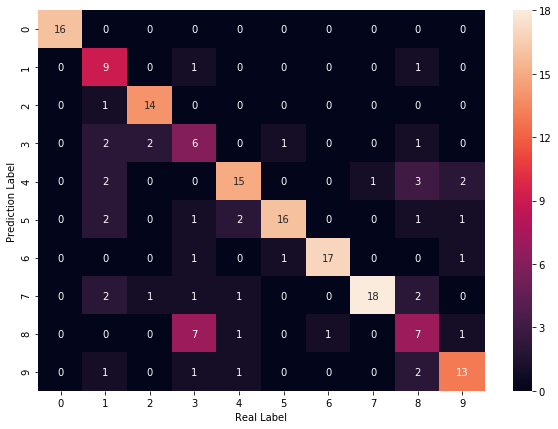

In [16]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [17]:
n_T = 0
for i in range(180):
    if list_P[i] == digits.target[1617+i]:
        n_T += 1
print("Accuracy:{}".format(n_T/180))

Accuracy:0.7277777777777777


In [18]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:295 Total connections::516
